In [1]:
import numpy as np
import pygtrie
from statsmodels.stats import multitest
import collections
import os
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib

import sys
sys.path.append('../')
from utils import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 24, colors = 'banskt', dpi = 72)

In [ ]:
from scipy.stats import norm

In [2]:
def read_tejaas(filename):
    rsidlist = list()
    pvallist = list()
    qscrlist = list()
    qmeanlist = list()
    qvarlist  = list()
    qscalelist = list()
    with open(filename, 'r') as instream:
        next(instream)
        for line in instream:
            linesplit = line.strip().split()
            rsid = linesplit[0]
            qscr = float(linesplit[2])
            qmean = float(linesplit[3])
            qvar = float(linesplit[4])
            pval = float(linesplit[5])
            #pval = 1 - norm.cdf(qscr, loc=qmean, scale=qvar)
            qscale = (qscr - qmean) / qvar
            #pval = 2.0 * (1 - norm.cdf(np.abs(qscale)))
            rsidlist.append(rsid)
            pvallist.append(pval)
            qscrlist.append(qscr)
            qmeanlist.append(qmean)
            qvarlist.append(qvar)
            qscalelist.append(qscale)
    return rsidlist, pvallist, qscrlist, qmeanlist, qvarlist, qscalelist

def read_gene_snplist(filename, rsidlist):
    getres = collections.defaultdict(lambda: False)
    triestr = pygtrie.StringTrie()
    for rsid in rsidlist:
        getres[rsid] = True
        triestr[rsid] = list()
    with open(filename, 'r') as instream:
        next(instream)
        for line in instream:
            linesplit = line.strip().split()
            rsid = linesplit[1]
            gene = linesplit[0]
            if getres[rsid]:
                if float(linesplit[2]) < 1e-5:
                    triestr[rsid].append(gene)
    return triestr

In [3]:
resdir = "/scratch/sbanerj/trans-eqtl/dev-pipeline/gtex/normalized_lmcorrected_withage_10peer/"
tissue = "esom"
#resdir = "/cbscratch/franco/trans-eqtl/dev-pipeline/lmcorrected"
#tisse = 'gtex-thy'

gwrsids = list()
gwpvals = list()
gwqstat = list()
gwqmean = list()
gwqvars = list()
gwqscale = list()
for chrm in range(1, 2):
    chrdir = "chr{:d}".format(chrm)
    srcdir = os.path.join(resdir, tissue)
    #randfile = os.path.join(srcdir, 'tejaas_rand/permnull_sb0.05/{:s}/rr.txt'.format(chrdir))
    rrfile = os.path.join(srcdir, 'tejaas/permnull_sb0.05/{:s}/chunk000_rr.txt'.format(chrdir))
    rsids, pvals, qstats, qmeans, qvars, qscale = read_tejaas(rrfile)
    gwrsids += rsids
    gwpvals += pvals
    gwqstat += qstats
    gwqmean += qmeans
    gwqvars += qvars
    gwqscale += qscale

In [4]:
gwpvals = np.array(gwpvals)
pmin  = np.min(gwpvals[np.where(gwpvals > 0)])
nonzero_pvals = gwpvals.copy()
nonzero_pvals[np.where(gwpvals == 0)] = pmin
gwlogpvals = -np.log10(nonzero_pvals)
gwqstat = np.array(gwqstat)
gwqmean = np.array(gwqmean)
gwqvars = np.array(gwqvars)
gwqscale = np.array(gwqscale)

#select, pcorr = multitest.fdrcorrection(gwpvalsarr, alpha = 0.5)
#select_rsids = [gwrsids[i] for i in np.where(select)[0]]

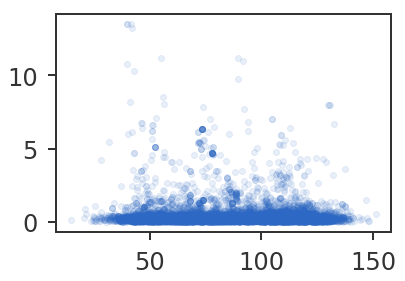

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

#ax1.hist(pcorr)

nchoose = np.sort(np.random.choice(gwlogpvals.shape[0], size = 10000, replace = False))
#ax1.hist(gwqscale[np.where(gwpvals == 0)])
#ax1.hist(np.abs(gwqscale))
#ax1.hist(gwpvals)
#ax1.scatter(gwqmean, gwqvars)
ax1.scatter(gwqstat[nchoose], gwlogpvals[nchoose], alpha = 0.1)
#ax1.scatter(gwqstat, gwlogpvals, alpha = 0.03)
#plt.show()
#ax1.scatter(gwqmean[np.where(gwpvals > 0.99)], gwqvars[np.where(gwpvals > 0.99)], alpha = 0.1)
#ax1.hist(gwqstat[np.where(gwpvals > 0.99)])


#ax1.hist(gwqstat)
plt.show()

In [10]:
gwpvals[np.where(gwpvals < 0.000001)]

array([2.30828e-07, 2.59653e-07, 9.74157e-08, 9.74157e-08, 5.37235e-08,
       6.93746e-09, 3.46679e-10, 1.13626e-07, 0.00000e+00, 6.34510e-07,
       7.28880e-07, 7.28880e-07, 7.28880e-07, 1.58862e-11, 1.58862e-11,
       6.10623e-14, 6.39899e-09, 6.39899e-09, 6.39899e-09, 5.22506e-11,
       6.39899e-09, 5.22506e-11, 8.01098e-08, 8.01098e-08, 6.39899e-09,
       1.37040e-10, 7.28269e-08, 6.62914e-12, 3.28626e-14, 1.53085e-08,
       1.53085e-08, 6.96151e-07, 4.96598e-07, 4.96598e-07, 4.96598e-07,
       4.96598e-07, 4.96598e-07, 4.96598e-07, 1.88341e-08, 4.96598e-07,
       4.96598e-07, 4.96598e-07, 4.96598e-07, 4.96598e-07, 3.15566e-07,
       4.96598e-07, 4.96598e-07, 4.96598e-07, 2.68165e-09, 7.50649e-07,
       7.50649e-07, 4.96598e-07, 4.96598e-07, 4.96598e-07, 4.96598e-07,
       4.96598e-07, 4.96598e-07, 4.96598e-07, 4.96598e-07, 4.96598e-07,
       4.96598e-07, 4.96598e-07, 4.96598e-07, 9.84691e-08, 4.96598e-07,
       4.96598e-07, 4.96598e-07, 4.78787e-08, 8.60019e-07, 0.000

In [ ]:
badrsids = [gwrsids[i] for i in np.where(gwpvals > 0.99)[0]]

In [ ]:
gwpvals[:100]

In [ ]:
resdir = "/scratch/sbanerj/trans-eqtl/dev-pipeline/gtex/normalized_lmcorrected_withage"
tissue = "esom"
#resdir = "/cbscratch/franco/trans-eqtl/dev-pipeline/lmcorrected"
#tisse = 'gtex-thy'

gwrsids = list()
gwpvals = list()
gwqstat = list()
for chrm in range(1, 2):
    chrdir = "chr{:d}".format(chrm)
    srcdir = os.path.join(resdir, tissue)
    #randfile = os.path.join(srcdir, 'tejaas_rand/permnull_sb0.05/{:s}/rr.txt'.format(chrdir))
    rrfile = os.path.join(srcdir, 'tejaas/permnull_sb0.05/{:s}/chunk000_rr.txt'.format(chrdir))
    rsids, pvals, qstats = read_tejaas(rrfile)
    gwrsids += rsids
    gwpvals += pvals
    gwqstat += qstats
    
gwlogpvals = np.array(-np.log10(gwpvals))
gwpvals = np.array(gwpvals)
gwqstat = np.array(gwqstat)

fig = plt.figure()
ax1 = fig.add_subplot(111)

#ax1.hist(gwpvalsarr)
#ax1.hist(pcorr)

nchoose = np.sort(np.random.choice(gwlogpvals.shape[0], size = 10000, replace = False))
#ax1.hist(gwpvals[np.where(gwpvals < 0.9)])
#ax1.scatter(gwqstat[nchoose], gwlogpvals[nchoose], alpha = 0.1)
#ax1.scatter(gwqstat, gwlogpvals, alpha = 0.03)
#plt.show()

#ax1.scatter(gwqstat, gwpvalsarr)

ax1.hist(gwqstat)
plt.show()

In [ ]:
badrsids_2 = [gwrsids[i] for i in np.where(gwpvals > 0.99)[0]]

In [ ]:
gwpvals[:100]

In [ ]:
len(badrsids_2)

In [ ]:
common_badrsids = set(badrsids).intersection(set(badrsids_2))

In [ ]:
with open('badrsids.txt', 'w') as fout:
    for rsid in common_badrsids:
        fout.write("{:s}\n".format(rsid))

In [ ]:
resdir = "/scratch/sbanerj/trans-eqtl/dev-pipeline/gtex/normalized_lmcorrected_withage_10peer"
tissue = "esom"
#resdir = "/cbscratch/franco/trans-eqtl/dev-pipeline/lmcorrected"
#tisse = 'gtex-thy'

gwrsids = list()
gwpvals = list()
gwqstat = list()
for chrm in range(1, 2):
    chrdir = "chr{:d}".format(chrm)
    srcdir = os.path.join(resdir, tissue)
    #randfile = os.path.join(srcdir, 'tejaas_rand/permnull_sb0.05/{:s}/rr.txt'.format(chrdir))
    rrfile = os.path.join(srcdir, 'tejaas/permnull_sb0.05/{:s}/rr.txt'.format(chrdir))
    rsids, pvals, qstats = read_tejaas(rrfile)
    gwrsids += rsids
    gwpvals += pvals
    gwqstat += qstats

gwpvals = np.array(gwpvals)
gwqstat = np.array(gwqstat)
fig = plt.figure()
ax1 = fig.add_subplot(111)

nchoose = np.sort(np.random.choice(gwpvals.shape[0], size = 10000, replace = False))
#ax1.hist(pvals)
ax1.scatter(gwqstat[nchoose], gwpvals[nchoose], alpha = 0.1)
plt.show()

#ax1.hist(gwpvalsarr)
#ax1.hist(pcorr)
#plt.show()

In [ ]:
resdir = "/scratch/sbanerj/trans-eqtl/dev-pipeline/gtex/normalized_lmcorrected_withage_35peer"
tissue = "esom"
#resdir = "/cbscratch/franco/trans-eqtl/dev-pipeline/lmcorrected"
#tisse = 'gtex-thy'

gwrsids = list()
gwpvals = list()
for chrm in range(1, 2):
    chrdir = "chr{:d}".format(chrm)
    srcdir = os.path.join(resdir, tissue)
    #randfile = os.path.join(srcdir, 'tejaas_rand/permnull_sb0.05/{:s}/rr.txt'.format(chrdir))
    rrfile = os.path.join(srcdir, 'tejaas/permnull_sb0.05/{:s}/rr.txt'.format(chrdir))
    rsids, pvals = read_tejaas(rrfile)
    gwrsids += rsids
    gwpvals += pvals
gwpvalsarr = np.array(gwpvals)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.hist(gwpvalsarr)
#ax1.hist(pcorr)
plt.show()

In [ ]:
rrgenefile = os.path.join(srcdir, 'tejaas/permnull_sb0.05/{:s}/gene_snp_list.txt')
truefile = os.path.join(srcdir, 'input/expression.trans')
    
    
    rr_rsids, rr_pvals = read_tejaas(rrfile)
    pvals = np.array(rr_pvals)
    select, pcorr = multitest.fdrcorrection(pvals, alpha = 0.005)
    select_rsids = [rr_rsids[i] for i in np.where(select)[0]]
    select_genes = read_gene_snplist(rrgenefile, select_rsids)
    true_rsids, true_genes = read_true_genes(truefile)
    
    for rsid in select_rsids:
        if len(select_genes[rsid]) > 0:
            if rsid in true_rsids:
                common_genes = len(set(select_genes[rsid]).intersection(true_genes[rsid]))
                uncommon_genes = len(select_genes[rsid]) - common_genes
                res_common.append(common_genes)
                res_uncommon.append(uncommon_genes)
            else:
                false_genes = len(select_genes[rsid])
                res_false.append(false_genes)